**CREDIT CARD FRAUD DETECTION**

In [ ]:
#Import necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Load

In [ ]:
data = pd.read_csv('creditcard.csv')

View dataset

In [ ]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85259 entries, 0 to 85258
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    85259 non-null  int64  
 1   V1      85259 non-null  float64
 2   V2      85259 non-null  float64
 3   V3      85259 non-null  float64
 4   V4      85259 non-null  float64
 5   V5      85259 non-null  float64
 6   V6      85259 non-null  float64
 7   V7      85259 non-null  float64
 8   V8      85259 non-null  float64
 9   V9      85259 non-null  float64
 10  V10     85259 non-null  float64
 11  V11     85259 non-null  float64
 12  V12     85259 non-null  float64
 13  V13     85259 non-null  float64
 14  V14     85259 non-null  float64
 15  V15     85259 non-null  float64
 16  V16     85259 non-null  float64
 17  V17     85259 non-null  float64
 18  V18     85259 non-null  float64
 19  V19     85259 non-null  float64
 20  V20     85259 non-null  float64
 21  V21     85259 non-null  float64
 22

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,...,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85258.000000,85258.000000,85258.000000,85258.000000
mean,38698.541691,-0.262585,-0.039207,0.679054,0.163611,-0.277616,0.094861,-0.111651,0.054145,-0.021205,...,-0.029273,-0.105613,-0.037762,0.008986,0.133598,0.026270,0.001449,0.001934,98.374057,0.002393
std,15668.300002,1.878484,1.670189,1.366683,1.363280,1.375170,1.303646,1.237707,1.223035,1.135023,...,0.731860,0.635127,0.626519,0.595040,0.441017,0.497236,0.389486,0.328312,268.381509,0.048857
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,31595.000000,-1.025883,-0.602941,0.184642,-0.722311,-0.896999,-0.644375,-0.603378,-0.140721,-0.690902,...,-0.223696,-0.524879,-0.178156,-0.322420,-0.130610,-0.326403,-0.063467,-0.005899,7.680000,0.000000
50%,41180.000000,-0.258057,0.069615,0.762733,0.186825,-0.311837,-0.155047,-0.072501,0.070103,-0.097017,...,-0.057764,-0.080822,-0.049921,0.064547,0.171852,-0.072601,0.009302,0.022947,26.990000,0.000000
75%,50942.000000,1.153099,0.724933,1.390659,1.042062,0.257707,0.488674,0.416990,0.352738,0.602616,...,0.118290,0.309640,0.080706,0.405794,0.421184,0.306305,0.082480,0.076063,89.900000,0.000000
max,60684.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,18.946734,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
data.shape

(85259, 31)

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**DATA CLEANING**

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
85253,False
85254,False
85255,False
85256,False


In [ ]:
data.duplicated().sum()

314

Remove duplicates

In [ ]:
data =  data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

**EXPLORATORY DATA ANALYSIS**

Plot class distribution

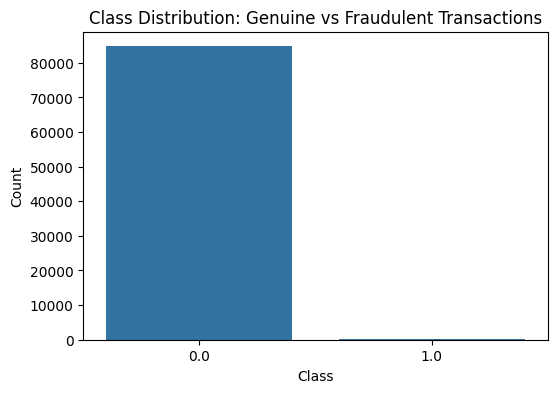

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution: Gxenuine vs Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:
print("Class Distribution")
class_counts = data['Class'].value_counts()
print(class_counts)

Class Distribution
Class
0.0    84740
1.0      204
Name: count, dtype: int64


Visualizing data

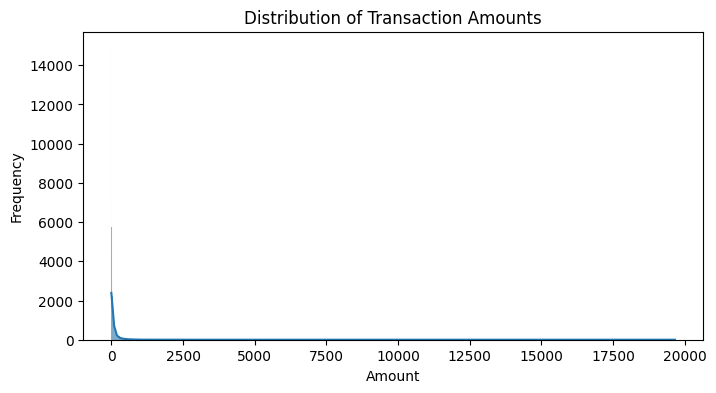

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data['Amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Scatterplot for Class vs Transaction Amount

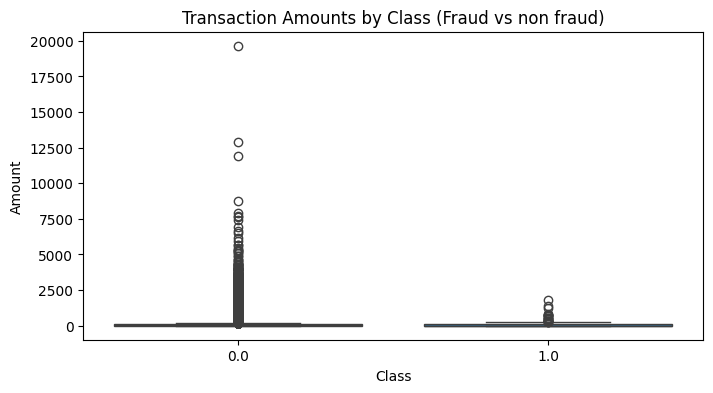

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Transaction Amounts by Class (Fraud vs non fraud)')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

Scatterplot for time vs Transaction Amount


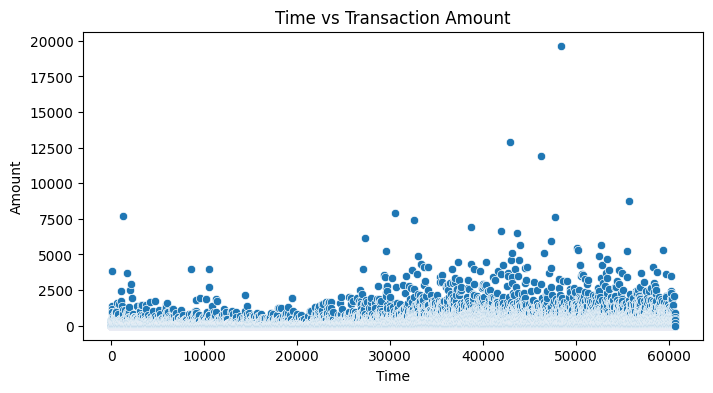

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Time', y='Amount', data=data)
plt.title('Time vs Transaction Amount')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [ ]:
import plotly.express as px
fraud = data[data['Class'] == 1]
fig = px.scatter(fraud, x='Time', y='Amount', color='Class', title='Fraudulent Transactions',
                 labels={'Time': 'Time', 'Amount': 'Amount'})
fig.show()

<ipython-input-26-ef51917109ed>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




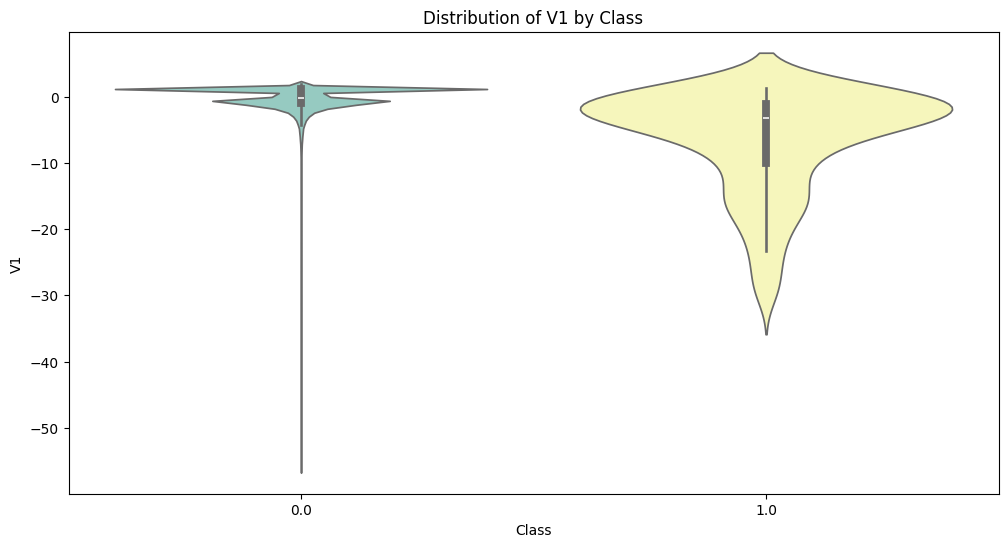

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Class', y='V1', palette='Set3', data=data)
plt.title('Distribution of V1 by Class')
plt.xlabel('Class')
plt.ylabel('V1')
plt.show()

Correlation Heatmap

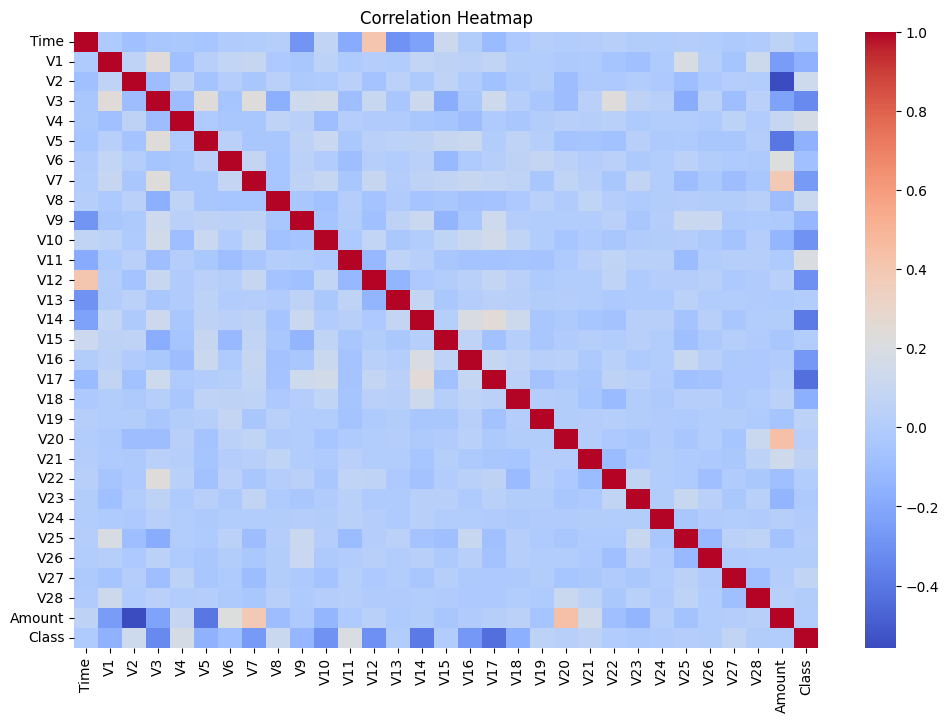

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Data Splitting**

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


Standardize Amount column

In [ ]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

Drop Time

In [ ]:
X = X.drop('Time', axis=1)

Handling CLass Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
print('Original Class Distribution:', Counter(y))
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


Original Class Distribution: Counter({0.0: 84740, 1.0: 204})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



In [ ]:
print('Resampled Class Distribution:', Counter(y_resampled))

Resampled Class Distribution: Counter({0.0: 84740, 1.0: 84740})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**MODEL TRAINING**

Logistic Regression

In [ ]:
print('Logistic Regression')
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, lr_pred))
print('Classification Report:\n', classification_report(y_test, lr_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, lr_pred))

Logistic Regression
Accuracy: 0.9686393674769884
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     16900
         1.0       0.98      0.96      0.97     16996

    accuracy                           0.97     33896
   macro avg       0.97      0.97      0.97     33896
weighted avg       0.97      0.97      0.97     33896

Confusion Matrix:
 [[16574   326]
 [  737 16259]]


Random Forest Classification

In [ ]:
print('Random Forest Classification')
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, rf_pred))
print('Classification Report:\n', classification_report(y_test, rf_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_pred))

Random Forest Classification
Accuracy: 0.9999704979938636
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16900
         1.0       1.00      1.00      1.00     16996

    accuracy                           1.00     33896
   macro avg       1.00      1.00      1.00     33896
weighted avg       1.00      1.00      1.00     33896

Confusion Matrix:
 [[16899     1]
 [    0 16996]]


Confusion Matrix

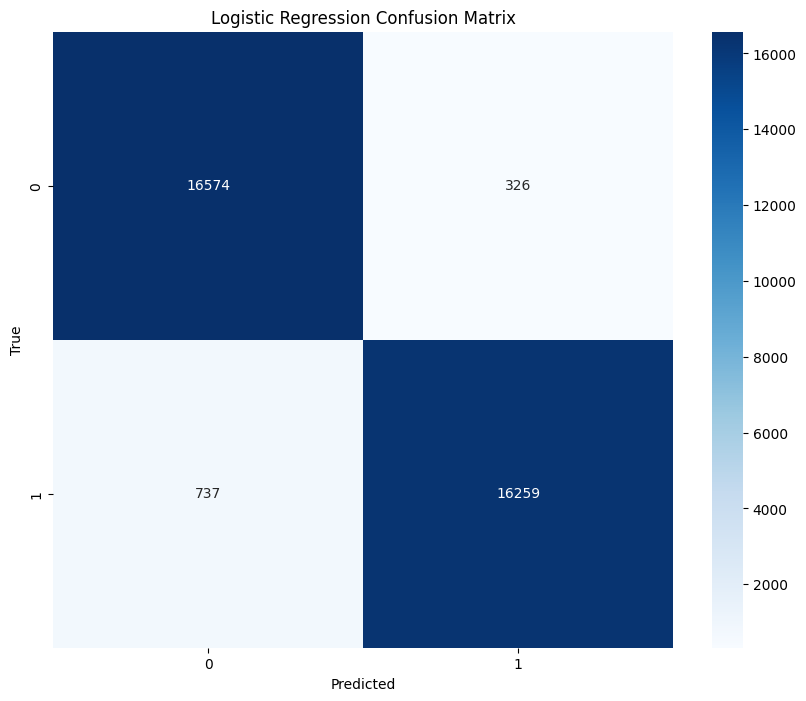

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

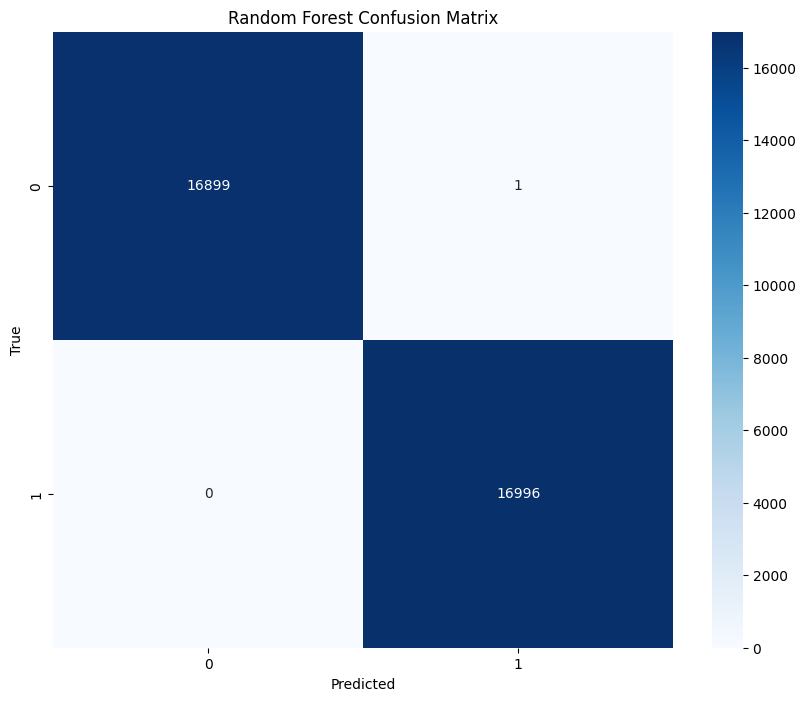

In [ ]:
#Confusion Matrix for Random Forest
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

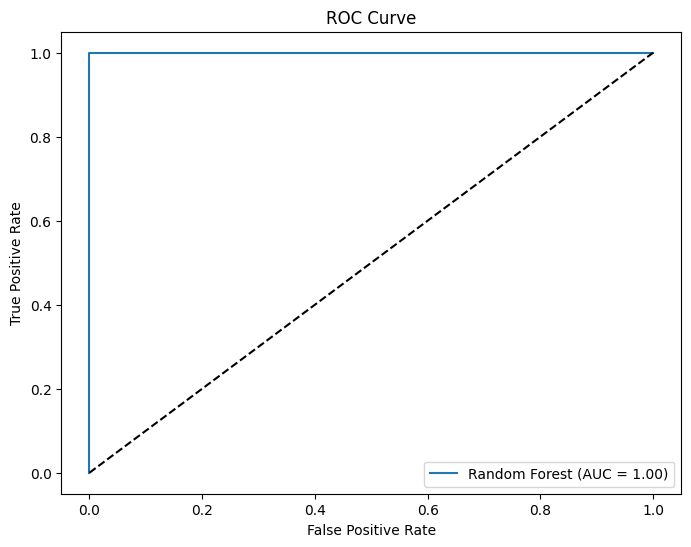

In [ ]:
#ROC AUC curve for Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**FEATURE ENGINEERING**

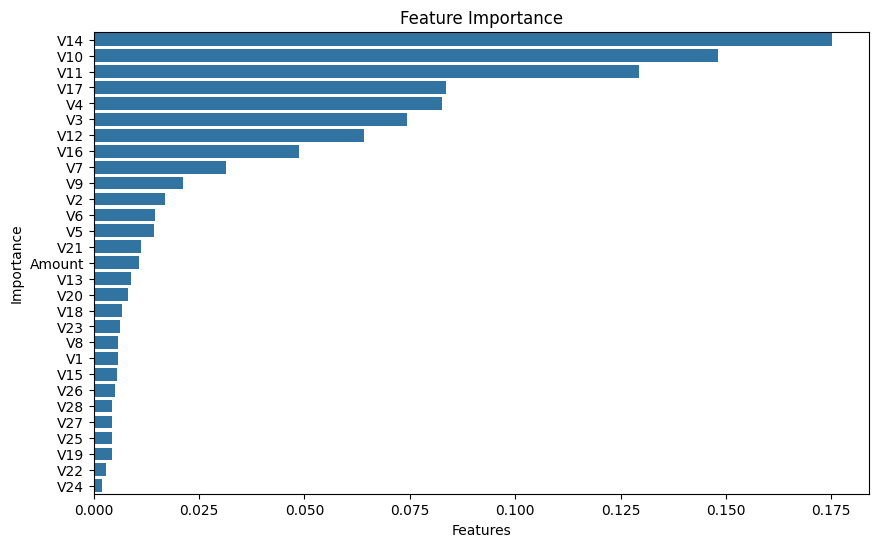

In [ ]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [ ]:
user_input = {
    "V1": -1.359807, "V2": -0.072781, "V3": 2.536346, "V4": 1.378155, "V5": -0.338321,
    "V6": 0.462388, "V7": 0.239599, "V8": 0.098698, "V9": 0.363787, "V10": 0.090794,
    "V11": -0.551600, "V12": -0.617801, "V13": -0.991390, "V14": -0.311169, "V15": 1.468177,
    "V16": -0.470400, "V17": 0.207971, "V18": 0.025790, "V19": 0.403993, "V20": 0.251412,
    "V21": -0.018307, "V22": 0.277838, "V23": -0.110474, "V24": 0.066928, "V25": 0.128539,
    "V26": -0.189115, "V27": 0.133558, "V28": -0.021053, "Amount": 149.62
}

#Convert user input to Dataframe
user_input_df = pd.DataFrame([user_input])
#Preprocess 'Amount' using standard Scaler
scaler = StandardScaler()
user_input_df['Amount'] = scaler.fit_transform(user_input_df[['Amount']])

#Make Predictions
prediction = rf_model.predict(user_input_df)

#Display Results
if prediction[0] == 1:
    print("Fraudulent Transaction ⚠")
else:
    print("Genuine Transaction ✔")

Genuine Transaction ✔


In [ ]:
def get_user_input():
    print("Please enter the following transaction details:")
    user_input = {}
    for i in range(1, 29):  # V1 to V28
        user_input[f"V{i}"] = float(input(f"Enter value for V{i}: "))
    user_input["Amount"] = float(input("Enter transaction Amount: "))
    return user_input

# Collect user input dynamically
user_input = get_user_input()

# Convert user input to DataFrame
user_input_df = pd.DataFrame([user_input])

# Preprocess 'Amount' using StandardScaler (use same scaler as training)
scaler = StandardScaler()
user_input_df['Amount'] = scaler.fit_transform(user_input_df[['Amount']])

# Make prediction
prediction = rf_model.predict(user_input_df)

# Display result
if prediction[0] == 1:
    print("This transaction is fraudulent ⚠")
else:
    print("This transaction is not fraudulent ✔")


Please enter the following transaction details:
Enter value for V1: 0.4
Enter value for V2: -0.6
Enter value for V3: 0.1
Enter value for V4: 0.6
Enter value for V5: 0.2
Enter value for V6: 0.2
Enter value for V7: -0.98
Enter value for V8: 0.9
Enter value for V9: 0.7
Enter value for V10: -0.55
Enter value for V11: -0.9
Enter value for V12: 0.32
Enter value for V13: -0.43
Enter value for V14: -0.78
Enter value for V15: 0.54
Enter value for V16: 0.22
Enter value for V17: 0.2
Enter value for V18: 0.234
Enter value for V19: -0.9
Enter value for V20: 0.97
Enter value for V21: 0
Enter value for V22: 0.67
Enter value for V23: 0.82
Enter value for V24: -0.72
Enter value for V25: -0.78
Enter value for V26: -0.96
Enter value for V27: 0.84
Enter value for V28: 0.47
Enter transaction Amount: 90000
This transaction is not fraudulent ✔
